In [1]:
import numpy as np
import matplotlib.pyplot as plt

# You may change the mhealth_activity module but your algorithm must support the original version
from mhealth_activity import Recording, Trace, Activity, WatchLocation, Path

# For interactive plots, uncomment the following line
# %matplotlib widget

In [2]:
import os
import pandas as pd

files = os.listdir('data/train')
list_of_dfs = []

for file in files:
    d = Recording(os.path.join('data/train',file))
    list_of_dfs.append(d)

data = pd.DataFrame(list_of_dfs)

### Make dataframes with every kind of variable and then export those

In [ ]:
def make_dataframe(key_names):
    data_list = []
    for row in data["recording"]:
        data_list.extend([row.data[key] for key in key_names])
    return data_list

In [3]:
data.columns = ["recording"]

In [4]:
## Dataframe for acceleration data
acceleration = []
for row in data["recording"]:
    acceleration.extend([[row.data["ax"],row.data["ay"],row.data["az"]]])

acceleration = np.array(acceleration)

In [5]:
data["recording"][0]

Recording(filename='train_trace_000.pkl', labels={'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}, data={'altitude': Trace(title='altitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'ax': Trace(title='ax', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'ay': Trace(title='ay', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'az': Trace(title='az', total_time=584.87, samplerate=200.30, max_update_gap=0.04), 'bearing': Trace(title='bearing', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'gx': Trace(title='gx', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gy': Trace(title='gy', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'gz': Trace(title='gz', total_time=584.87, samplerate=200.30, max_update_gap=0.02), 'latitude': Trace(title='latitude', total_time=584.87, samplerate=12.52, max_update_gap=9.99), 'longitude': Trace(title='longitude', total_time=584.87, samplerate=12.52, max_update_

In [6]:
len(acceleration)

396

In [7]:
acceleration.shape

(396, 3)

In [8]:
## Dataframe for gx, gy, gz
gyroscope = []
for row in data["recording"]:
    gyroscope.extend([[row.data["gx"],row.data["gy"],row.data["gz"]]])

gyroscope = np.array(gyroscope)

In [9]:
## Dataframe for magnetometer
magnetometer = []
for row in data["recording"]:
    magnetometer.extend([[row.data["mx"],row.data["my"],row.data["mz"]]])

magnetometer = np.array(magnetometer)

In [10]:
## Dataframe for temperature
temperature = []
for row in data["recording"]:
    temperature.append([row.data["temperature"]])

temperature = np.array(temperature)

In [11]:
## Dataframe for phone magnetometer
phone_magnetometer = []
for row in data["recording"]:
    phone_magnetometer.extend([[row.data["phone_mx"],row.data["phone_my"],row.data["phone_mz"]]])

phone_magnetometer = np.array(phone_magnetometer)

In [12]:
## Things that shall not be used for input - Excluding phone steps
not_input = []
for row in data["recording"]:
    not_input.extend([[row.data["latitude"],row.data["altitude"],row.data["bearing"],row.data["speed"],row.data["longitude"]]])

not_input = np.array(not_input)

In [13]:
## Dataframe for phone gyroscope
phone_gyroscope = []
for row in data["recording"]:
    phone_gyroscope.extend([[row.data["phone_gx"],row.data["phone_gy"],row.data["phone_gz"]]])

phone_gyroscope = np.array(phone_gyroscope)

In [14]:
## GRAVY
phone_gravy = []
for row in data["recording"]:
    phone_gravy.extend([[row.data["phone_gravx"],row.data["phone_gravy"],row.data["phone_gravz"]]])

phone_gravy = np.array(phone_gravy)

In [15]:
## Dataframe for temperature
phone_rotm = []
for row in data["recording"]:
    phone_rotm.append([row.data["phone_rotm"]])

phone_rotm = np.array(phone_rotm)

In [16]:
## phone la, ...
phone_la = []
for row in data["recording"]:
    phone_la.extend([[row.data["phone_lax"],row.data["phone_lay"],row.data["phone_laz"]]])

phone_la = np.array(phone_la)

In [17]:
## phone rotation
phone_rotation = []
for row in data["recording"]:
    phone_rotation.extend([[row.data["phone_rotx"],row.data["phone_roty"],row.data["phone_rotz"]]])

phone_rotation = np.array(phone_rotation)

In [59]:
data["recording"][1].data["packetNumber"]

Trace(title='packetNumber', total_time=519.01, samplerate=12.52, max_update_gap=0.27)

Some labels are incomplete: These are note, phone_steps, lost_packets, phone_orientationx, y, z

Unsure what to do with timestamp labels, packet_number

In [18]:
to_export = np.concatenate((acceleration,gyroscope,magnetometer,temperature,phone_magnetometer,not_input,
                            phone_gyroscope,phone_gravy,phone_rotm,phone_la,phone_rotation),axis=1)

#### Figure out how to make a nice signal dataframe

In [19]:
new_list = []
for x, t in list(zip(to_export[1][0].timestamps, to_export[1][0].values)):
    new_list.append([x,t])

In [56]:
bigger_list = []
for feature in to_export[1]:
    inside_list = []
    for x, t in list(zip(feature.timestamps, feature.values)):
        inside_list.append([x,t])
    bigger_list.append(inside_list)

In [23]:
def export_signals_as_csv(input_sample, sample_nr):
    bigger_list = []
    for feature in input_sample:
        inside_list = []
        for x, t in list(zip(feature.timestamps, feature.values)):
            inside_list.append([x,t])
        bigger_list.append(inside_list)
    bigger_list = pd.DataFrame(bigger_list)
    bigger_list.to_csv(f'extracted_signal_{sample_nr}.csv')

In [26]:
index = 0
for sample in to_export:
    export_signals_as_csv(sample, index)
    index = index + 1

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001232BA33550>>
Traceback (most recent call last):
  File "c:\Users\oliwi\Documents\MHA\mhavenv\Lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

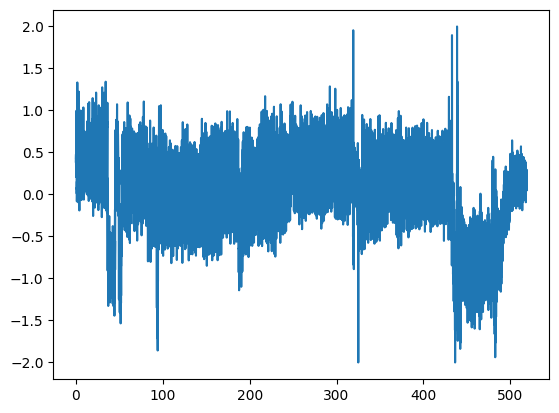

In [27]:
from scipy.fft import fft, fftfreq

new_list = pd.DataFrame(new_list)
plt.plot(new_list[0],new_list[1])

In [5]:
import scipy.stats as stats

FEATURES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS',
            'MAX_f','SUM_f','MEAN_f','VAR_f','PEAK_f','SKEW_f','KURTOSIS_f']

In [6]:
def features_extraction(df): 
    
    
    Min=[];Max=[];Mean=[];Rms=[];Var=[];Std=[];Power=[];Peak=[];Skew=[];Kurtosis=[];P2p=[];CrestFactor=[];
    FormFactor=[]; PulseIndicator=[];
    Max_f=[];Sum_f=[];Mean_f=[];Var_f=[];Peak_f=[];Skew_f=[];Kurtosis_f=[]
    
    X = df.values
    ## TIME DOMAIN ##

    Min.append(np.min(X))
    Max.append(np.max(X))
    Mean.append(np.mean(X))
    Rms.append(np.sqrt(np.mean(X**2)))
    Var.append(np.var(X))
    Std.append(np.std(X))
    Power.append(np.mean(X**2))
    Peak.append(np.max(np.abs(X)))
    P2p.append(np.ptp(X))
    CrestFactor.append(np.max(np.abs(X))/np.sqrt(np.mean(X**2)))
    Skew.append(stats.skew(X))
    Kurtosis.append(stats.kurtosis(X))
    FormFactor.append(np.sqrt(np.mean(X**2))/np.mean(X))
    PulseIndicator.append(np.max(np.abs(X))/np.mean(X))
    ## FREQ DOMAIN ##
    ft = fft(X)
    S = np.abs(ft**2)/len(df)
    Max_f.append(np.max(S))
    Sum_f.append(np.sum(S))
    Mean_f.append(np.mean(S))
    Var_f.append(np.var(S))
    
    Peak_f.append(np.max(np.abs(S)))
    Skew_f.append(stats.skew(X))
    Kurtosis_f.append(stats.kurtosis(X))
    #Create dataframe from features
    df_features = pd.DataFrame(index = [FEATURES], 
                               data = [Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,
                                       Max_f,Sum_f,Mean_f,Var_f,Peak_f,Skew_f,Kurtosis_f])
    return df_features

This requires a dataframe with accelerometer data and the time points

In [12]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [36]:
from scipy.fft import fft, fftfreq

inside_list = []
sample_rate = acceleration[0,0].samplerate
for x, t in list(zip(acceleration[0,0].timestamps, acceleration[0,0].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)

In [37]:
# Filter requirements.
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)

In [38]:
trial = pd.DataFrame.transpose(features_signal)

In [39]:
trial

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-1.332031,584.740097,146.363558,238.697188,35554.056439,188.557833,56976.347657,584.740097,586.072128,2.449715,"[5.013824790961451e-07, 0.487275145221049]","[-1.200000696931093, 1.2489979751858797]",11.714623,227905.390629,3.890764,12.116625,11.714623,"[5.013824790961451e-07, 0.487275145221049]","[-1.200000696931093, 1.2489979751858797]"


In [40]:
len(acceleration)

396

In [41]:
for sample in acceleration[1:,0]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])

In [43]:
trial

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-1.332031,584.740097,146.363558,238.697188,35554.056439,188.557833,56976.347657,584.740097,586.072128,2.449715,"[5.013824790961451e-07, 0.487275145221049]","[-1.200000696931093, 1.2489979751858797]",11.714623,227905.390629,3.890764,12.116625,11.714623,"[5.013824790961451e-07, 0.487275145221049]","[-1.200000696931093, 1.2489979751858797]"
0,-2.0,518.875095,129.729572,211.807899,28032.824073,167.430057,44862.586032,518.875095,520.875095,2.449744,"[6.366456427311208e-07, -0.7962396313533755]","[-1.2000008848542982, 0.5248112020175233]",10.36504,179450.344129,3.453093,9.544524,10.36504,"[6.366456427311208e-07, -0.7962396313533755]","[-1.2000008848542982, 0.5248112020175233]"
0,-2.0,593.985087,148.225606,242.471691,36821.69075,191.889788,58792.520943,593.985087,595.985087,2.449709,"[4.859178476871223e-07, -0.03709529799043918]","[-1.2000006754517871, 3.994634274734455]",11.915299,235170.083773,3.958026,12.53894,11.915299,"[4.859178476871223e-07, -0.03709529799043918]","[-1.2000006754517871, 3.994634274734455]"
0,-0.225098,519.497088,130.326814,212.062804,27985.554609,167.288836,44970.632966,519.497088,519.722185,2.449732,"[6.351338185346995e-07, 0.6736322811204655]","[-1.200000882761431, -0.2272112508110231]",10.424802,179882.531862,3.460877,9.587878,10.424802,"[6.351338185346995e-07, 0.6736322811204655]","[-1.200000882761431, -0.2272112508110231]"
0,-2.0,625.310085,155.814068,255.260524,40879.911495,202.187812,65157.935141,625.310085,627.310085,2.449694,"[4.384839897911248e-07, -0.8720677953014216]","[-1.2000006095436744, 0.19500382667866578]",12.551808,260631.740562,4.16824,13.906151,12.551808,"[4.384839897911248e-07, -0.8720677953014216]","[-1.2000006095436744, 0.19500382667866578]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.0,325.569083,81.392303,132.893147,11035.88163,105.051805,17660.58858,325.569083,327.569083,2.449856,"[1.6157100634619817e-06, 0.15256864176894333]","[-1.200002244361745, -0.3119154948506351]",6.537972,70642.354321,2.169605,3.769977,6.537972,"[1.6157100634619817e-06, 0.15256864176894333]","[-1.200002244361745, -0.3119154948506351]"
0,-1.345947,619.001086,154.566051,252.684011,39958.545513,199.896337,63849.209485,619.001086,620.347033,2.449704,"[4.4746044434024533e-07, -0.950127020253903]","[-1.2000006220157087, 3.730347790081412]",12.387999,255396.837938,4.125159,13.619965,12.387999,"[4.4746044434024533e-07, -0.950127020253903]","[-1.2000006220157087, 3.730347790081412]"
0,-1.605225,747.513088,186.91499,305.14881,58178.583057,241.20237,93115.796446,747.513088,749.118312,2.449667,"[3.068966272441571e-07, 0.9099978032358236]","[-1.2000004266767035, 0.9914826428881129]",14.961048,372463.185785,4.981053,19.856403,14.961048,"[3.068966272441571e-07, 0.9099978032358236]","[-1.2000004266767035, 0.9914826428881129]"
0,-2.0,455.874086,113.70763,186.087942,21699.297025,147.306813,34628.722206,455.874086,457.874086,2.449778,"[8.246186073441926e-07, -0.4038477606679349]","[-1.200001145970484, 0.40462789643911456]",9.12471,138514.888822,3.037607,7.38643,9.12471,"[8.246186073441926e-07, -0.4038477606679349]","[-1.200001145970484, 0.40462789643911456]"


In [44]:
trial.to_csv(f'extracted_signal_accelerator_x_lowpass.csv')

In [45]:
inside_list = []
sample_rate = acceleration[0,1].samplerate
for x, t in list(zip(acceleration[0,1].timestamps, acceleration[0,1].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)
trial = pd.DataFrame.transpose(features_signal)
for sample in acceleration[1:,1]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])
trial.to_csv(f'extracted_signal_accelerator_y_lowpass.csv')

In [46]:
trial

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-2.0,584.740097,146.257685,238.697034,35584.963318,188.639771,56976.273877,584.740097,586.740097,2.449717,"[5.013824790961451e-07, 0.12046064306174029]","[-1.200000696931093, 1.2397658846453465]",11.695713,227905.095507,3.890759,12.116448,11.695713,"[5.013824790961451e-07, 0.12046064306174029]","[-1.200000696931093, 1.2397658846453465]"
0,-1.834473,518.875095,129.407951,211.808235,28116.310411,167.679189,44862.728266,518.875095,520.709568,2.44974,"[6.366456427311208e-07, 1.7477611657231156]","[-1.2000008848542982, 3.0756175047607917]",10.396316,179450.913062,3.453104,9.54461,10.396316,"[6.366456427311208e-07, 1.7477611657231156]","[-1.2000008848542982, 3.0756175047607917]"
0,-1.229492,593.985087,148.9119,242.472276,36618.050399,191.358434,58792.80441,593.985087,595.214579,2.449703,"[4.859178476871223e-07, -0.8175032552232916]","[-1.2000006754517871, 0.901114779985885]",11.879456,235171.21764,3.958045,12.539332,11.879456,"[4.859178476871223e-07, -0.8175032552232916]","[-1.2000006754517871, 0.901114779985885]"
0,-1.58081,519.497088,129.81128,212.061632,28119.167401,167.687708,44970.13582,519.497088,521.077898,2.449746,"[6.351338185346995e-07, 0.20138190038647705]","[-1.200000882761431, 3.8298722941382923]",10.385721,179880.543279,3.460839,9.587287,10.385721,"[6.351338185346995e-07, 0.20138190038647705]","[-1.200000882761431, 3.8298722941382923]"
0,-0.553711,625.310085,156.378631,255.259596,40703.185066,201.750304,65157.46135,625.310085,625.863796,2.449703,"[4.384839897911248e-07, 0.17584784134821774]","[-1.2000006095436744, 0.7603581242024089]",12.516251,260629.845399,4.16821,13.905648,12.516251,"[4.384839897911248e-07, 0.17584784134821774]","[-1.2000006095436744, 0.7603581242024089]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-2.0,325.569083,81.993381,132.894613,10938.063711,104.585198,17660.978252,325.569083,327.569083,2.449829,"[1.6157100634619817e-06, -1.2352184932195749]","[-1.200002244361745, 3.626353617106475]",6.551056,70643.91301,2.169653,3.770213,6.551056,"[1.6157100634619817e-06, -1.2352184932195749]","[-1.200002244361745, 3.626353617106475]"
0,0.0,619.001086,155.22629,252.684983,39754.499421,199.385304,63849.700647,619.001086,619.001086,2.449695,"[4.4746044434024533e-07, 0.4061568057974311]","[-1.2000006220157087, -0.24570119468967633]",12.425901,255398.802588,4.125191,13.6205,12.425901,"[4.4746044434024533e-07, 0.4061568057974311]","[-1.2000006220157087, -0.24570119468967633]"
0,-2.0,747.513088,186.442495,305.149318,58355.302309,241.568422,93116.106157,747.513088,749.513088,2.449663,"[3.068966272441571e-07, 0.21279364720742427]","[-1.2000004266767035, 1.0324668149349074]",14.993515,372464.424627,4.981069,19.85684,14.993515,"[3.068966272441571e-07, 0.21279364720742427]","[-1.2000004266767035, 1.0324668149349074]"
0,-1.386963,455.874086,114.444747,186.089235,21531.603398,146.73651,34629.203481,455.874086,457.261049,2.449761,"[8.246186073441926e-07, -0.041463240486174724]","[-1.200001145970484, 0.13421984494827388]",9.127651,138516.813923,3.037649,7.386945,9.127651,"[8.246186073441926e-07, -0.041463240486174724]","[-1.200001145970484, 0.13421984494827388]"


In [47]:
inside_list = []
sample_rate = acceleration[0,2].samplerate
for x, t in list(zip(acceleration[0,2].timestamps, acceleration[0,2].values))[::4]:
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
order = 6
fs = sample_rate/4       # sample rate, Hz
cutoff = 5  # desired cutoff frequency of the filter, Hz
inside_list.iloc[:,0] = butter_lowpass_filter(inside_list.iloc[:,0], cutoff, fs, order)
features_signal = features_extraction(inside_list)
trial = pd.DataFrame.transpose(features_signal)
for sample in acceleration[1:,2]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values))[::4]:
        new.append([x,t])
    new = pd.DataFrame(new)
    sample_rate = sample.samplerate
    fs = sample_rate/4
    new.iloc[:,0] = butter_lowpass_filter(new.iloc[:,0], cutoff, fs, order)
    features_inside = features_extraction(new)
    trial = pd.concat([trial,pd.DataFrame.transpose(features_inside)])
trial.to_csv(f'extracted_signal_accelerator_z_lowpass.csv')

### Visualize labels - Create a dataframe with all the labels

In [48]:
data["recording"][0].labels

{'path_idx': 2, 'activities': [1], 'step_count': None, 'watch_loc': 1}

In [49]:
labels = []
for sample in data["recording"]:
    labels.extend([[sample.labels["path_idx"],sample.labels["activities"],sample.labels["step_count"],sample.labels["watch_loc"]]])

In [50]:
labels = pd.DataFrame(labels)

In [51]:
labels.head(20)

,0,1,2,3
0,2,[1],NaN,1
1,0,"[1, 2]",NaN,0
2,0,"[0, 1, 2]",NaN,0
3,2,[1],NaN,1
4,1,[1],NaN,1
5,1,[1],NaN,2
6,3,[1],NaN,1
7,0,[1],NaN,1
8,1,[1],NaN,2
9,3,[1],NaN,0


Path index, longitude, latitude, speed, phone steps and activity

### Random forests on path index and smartwatch location

Merge both, the accelerator and label dataframes

In [52]:
accelerator_x = pd.read_csv("extracted_signal_accelerator_x_lowpass.csv")
accelerator_y = pd.read_csv("extracted_signal_accelerator_y_lowpass.csv")
accelerator_z = pd.read_csv("extracted_signal_accelerator_z_lowpass.csv")

In [53]:
accelerator_x = accelerator_x.rename(columns={"MIN":"min_x","MAX":"max_x","MEAN":"mean_x","RMS":"rms_x","VAR":"var_x",
                              "STD":"std_x","POWER":"power_x","PEAK":"peak_x","P2P":"p2p_x","CREST FACTOR":"crest factor x",
                              "SKEW":"skew x","KURTOSIS":"kurtosis x","MAX_f":"max f x","SUM_f":"sum f x",
                              "MEAN_f":"mean f x", "VAR_f":"var f x","PEAK_f":"peak f x","SKEW_f":"skew f x","KURTOSIS_f":"kurtosis f x"})

In [54]:
accelerator_y = accelerator_y.rename(columns={"MIN":"min_y","MAX":"max_y","MEAN":"mean_y","RMS":"rms_y","VAR":"var_y",
                              "STD":"std_y","POWER":"power_y","PEAK":"peak_y","P2P":"p2p_y","CREST FACTOR":"crest factor y",
                              "SKEW":"skew y","KURTOSIS":"kurtosis y","MAX_f":"max f y","SUM_f":"sum f y",
                              "MEAN_f":"mean f y", "VAR_f":"var f y","PEAK_f":"peak f y","SKEW_f":"skew f y","KURTOSIS_f":"kurtosis f y"})

In [55]:
accelerator_z = accelerator_z.rename(columns={"MIN":"min_z","MAX":"max_z","MEAN":"mean_z","RMS":"rms_z","VAR":"var_z",
                              "STD":"std_z","POWER":"power_z","PEAK":"peak_z","P2P":"p2p_z","CREST FACTOR":"crest factor z",
                              "SKEW":"skew z","KURTOSIS":"kurtosis z","MAX_f":"max f z","SUM_f":"sum f z",
                              "MEAN_f":"mean f z", "VAR_f":"var f z","PEAK_f":"peak f z","SKEW_f":"skew f z","KURTOSIS_f":"kurtosis f z"})

In [56]:
random_forest_data = pd.concat([accelerator_x,accelerator_y,accelerator_z],axis=1)

In [57]:
random_forest_data = pd.concat([random_forest_data,labels[0],labels[3]],axis=1)

In [58]:
random_forest_data = random_forest_data.rename(columns={0:"path_index",3:"smartwatch_location"})

In [59]:
random_forest_data.columns

Index(['Unnamed: 0', 'min_x', 'max_x', 'mean_x', 'rms_x', 'var_x', 'std_x',
       'power_x', 'peak_x', 'p2p_x', 'crest factor x', 'skew x', 'kurtosis x',
       'max f x', 'sum f x', 'mean f x', 'var f x', 'peak f x', 'skew f x',
       'kurtosis f x', 'Unnamed: 0', 'min_y', 'max_y', 'mean_y', 'rms_y',
       'var_y', 'std_y', 'power_y', 'peak_y', 'p2p_y', 'crest factor y',
       'skew y', 'kurtosis y', 'max f y', 'sum f y', 'mean f y', 'var f y',
       'peak f y', 'skew f y', 'kurtosis f y', 'Unnamed: 0', 'min_z', 'max_z',
       'mean_z', 'rms_z', 'var_z', 'std_z', 'power_z', 'peak_z', 'p2p_z',
       'crest factor z', 'skew z', 'kurtosis z', 'max f z', 'sum f z',
       'mean f z', 'var f z', 'peak f z', 'skew f z', 'kurtosis f z',
       'path_index', 'smartwatch_location'],
      dtype='object')

In [60]:
random_forest_data = random_forest_data.drop('Unnamed: 0',axis=1)

Find out where labels for both classes are not given - There are no missing values for these labels in the training set

In [61]:
np.where(random_forest_data.isna()["smartwatch_location"])

(array([], dtype=int64),)

#### Extract signals from test set and predict path indices and smartwatch locations

In [62]:
### Extraction of features from signals
files_test = os.listdir('data/test')
list_of_dfs = []

for file in files_test:
    d = Recording(os.path.join('data/test',file))
    list_of_dfs.append(d)

data_test = pd.DataFrame(list_of_dfs)

In [91]:
data_test.columns = ["recording"]

acceleration = []
for row in data_test["recording"]:
    acceleration.extend([[row.data["ax"],row.data["ay"],row.data["az"]]])

acceleration = np.array(acceleration)

inside_list = []
for x, t in list(zip(acceleration[0,0].timestamps, acceleration[0,0].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_x = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,0]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_x = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [67]:
inside_list = []
for x, t in list(zip(acceleration[0,1].timestamps, acceleration[0,1].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_y = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,1]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_y = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [66]:
inside_list = []
for x, t in list(zip(acceleration[0,2].timestamps, acceleration[0,2].values)):
    inside_list.append([x,t])
inside_list = pd.DataFrame(inside_list)
features_signal = features_extraction(inside_list)

features_test_z = pd.DataFrame.transpose(features_signal)

for sample in acceleration[1:,2]:
    new = []
    for x, t in list(zip(sample.timestamps, sample.values)):
        new.append([x,t])
    new = pd.DataFrame(new)
    features_inside = features_extraction(new)
    features_test_z = pd.concat([features_test_x,pd.DataFrame.transpose(features_inside)])

In [92]:
features_test_x

,MIN,MAX,MEAN,RMS,VAR,STD,POWER,PEAK,P2P,CREST FACTOR,SKEW,KURTOSIS,MAX_f,SUM_f,MEAN_f,VAR_f,PEAK_f,SKEW_f,KURTOSIS_f
0,-2.0,646.416,161.175376,263.899592,43665.492783,208.962898,69642.994516,646.416,648.416,2.449477,"[-4.725008759989942e-16, 0.062261122585594436]","[-1.2000000001437392, 2.7649455920000436]",3.252497,278571.978063,1.077931,0.929578,3.252497,"[-4.725008759989942e-16, 0.062261122585594436]","[-1.2000000001437392, 2.7649455920000436]"
0,-2.0,247.216,61.453826,100.930157,6410.323901,80.064498,10186.896648,247.216,249.216,2.449377,"[-8.092957487261067e-16, 0.06407034767285276]","[-1.2000000009818705, -1.4491472342969576]",1.245056,40747.586591,0.412091,0.135892,1.245056,"[-8.092957487261067e-16, 0.06407034767285276]","[-1.2000000009818705, -1.4491472342969576]"
0,-2.0,568.588,142.040169,232.125775,33706.965778,183.594569,53882.375457,568.588,570.588,2.449482,"[9.102092948929349e-17, -0.525858330615142]","[-1.2000000001855562, 3.453181956763152]",2.844714,215529.501828,0.947566,0.718314,2.844714,"[9.102092948929349e-17, -0.525858330615142]","[-1.2000000001855562, 3.453181956763152]"
0,-1.952637,436.641,109.439353,178.259456,19799.461573,140.71056,31776.43349,436.641,438.593637,2.449469,"[-4.3599482402054694e-17, 0.5092249114018462]","[-1.2000000003143603, 1.02865789560947]",2.185955,127105.733959,0.727349,0.423257,2.185955,"[-4.3599482402054694e-17, 0.5092249114018462]","[-1.2000000003143603, 1.02865789560947]"
0,-2.0,524.094,130.821273,213.961383,28665.267856,169.308204,45779.47333,524.094,526.094,2.449479,"[-1.679912962794738e-16, 0.7024697275617846]","[-1.200000000218052, 4.0121040906918095]",2.62763,183117.893321,0.872721,0.609327,2.62763,"[-1.679912962794738e-16, 0.7024697275617846]","[-1.200000000218052, 4.0121040906918095]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.181641,284.642,71.27104,116.205239,8424.096354,91.782876,13503.657538,284.642,284.823641,2.449476,"[-4.827031890869304e-16, -0.09263540007301083]","[-1.200000000739311, 0.2797143371938908]",1.424874,54014.63015,0.474012,0.179755,1.424874,"[-4.827031890869304e-16, -0.09263540007301083]","[-1.200000000739311, 0.2797143371938908]"
0,-2.0,241.115,60.283651,98.435708,6055.470024,77.816901,9689.588554,241.115,243.115,2.449467,"[5.913248461840362e-17, -0.6042840054568366]","[-1.2000000010493481, 2.73705243625715]",1.219737,38758.354218,0.405219,0.131368,1.219737,"[5.913248461840362e-17, -0.6042840054568366]","[-1.2000000010493481, 2.73705243625715]"
0,-2.0,586.809,146.311263,239.565049,35984.427252,189.695617,57391.412888,586.809,588.809,2.449477,"[3.4756513534334287e-16, -0.8325460082511454]","[-1.2000000001741071, 0.4516376805053093]",2.940913,229565.651551,0.977641,0.764647,2.940913,"[3.4756513534334287e-16, -0.8325460082511454]","[-1.2000000001741071, 0.4516376805053093]"
0,-1.400391,556.899,139.076381,227.353692,32347.461628,179.854001,51689.701457,556.899,558.299391,2.449483,"[1.0876423913369037e-15, -2.381504576488151]","[-1.2000000001933098, 9.339705809444844]",2.791262,206758.805828,0.927802,0.688662,2.791262,"[1.0876423913369037e-15, -2.381504576488151]","[-1.2000000001933098, 9.339705809444844]"


In [68]:
features_test_x = features_test_x.rename(columns={"MIN":"min_x","MAX":"max_x","MEAN":"mean_x","RMS":"rms_x","VAR":"var_x",
                              "STD":"std_x","POWER":"power_x","PEAK":"peak_x","P2P":"p2p_x","CREST FACTOR":"crest factor x",
                              "SKEW":"skew x","KURTOSIS":"kurtosis x","MAX_f":"max f x","SUM_f":"sum f x",
                              "MEAN_f":"mean f x", "VAR_f":"var f x","PEAK_f":"peak f x","SKEW_f":"skew f x","KURTOSIS_f":"kurtosis f x"})

In [69]:
features_test_y = features_test_y.rename(columns={"MIN":"min_y","MAX":"max_y","MEAN":"mean_y","RMS":"rms_y","VAR":"var_y",
                              "STD":"std_y","POWER":"power_y","PEAK":"peak_y","P2P":"p2p_y","CREST FACTOR":"crest factor y",
                              "SKEW":"skew y","KURTOSIS":"kurtosis y","MAX_f":"max f y","SUM_f":"sum f y",
                              "MEAN_f":"mean f y", "VAR_f":"var f y","PEAK_f":"peak f y","SKEW_f":"skew f y","KURTOSIS_f":"kurtosis f y"})

In [70]:
features_test_z = features_test_z.rename(columns={"MIN":"min_z","MAX":"max_z","MEAN":"mean_z","RMS":"rms_z","VAR":"var_z",
                              "STD":"std_z","POWER":"power_z","PEAK":"peak_z","P2P":"p2p_z","CREST FACTOR":"crest factor z",
                              "SKEW":"skew z","KURTOSIS":"kurtosis z","MAX_f":"max f z","SUM_f":"sum f z",
                              "MEAN_f":"mean f z", "VAR_f":"var f z","PEAK_f":"peak f z","SKEW_f":"skew f z","KURTOSIS_f":"kurtosis f z"})

In [90]:
features_test_x

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,skew x,kurtosis x,max f x,sum f x,mean f x,var f x,peak f x,skew f x,kurtosis f x
0,-2.0,646.416,161.175376,263.899592,43665.492783,208.962898,69642.994516,646.416,648.416,2.449477,"[-4.725008759989942e-16, 0.062261122585594436]","[-1.2000000001437392, 2.7649455920000436]",3.252497,278571.978063,1.077931,0.929578,3.252497,"[-4.725008759989942e-16, 0.062261122585594436]","[-1.2000000001437392, 2.7649455920000436]"
0,-2.0,247.216,61.453826,100.930157,6410.323901,80.064498,10186.896648,247.216,249.216,2.449377,"[-8.092957487261067e-16, 0.06407034767285276]","[-1.2000000009818705, -1.4491472342969576]",1.245056,40747.586591,0.412091,0.135892,1.245056,"[-8.092957487261067e-16, 0.06407034767285276]","[-1.2000000009818705, -1.4491472342969576]"
0,-2.0,568.588,142.040169,232.125775,33706.965778,183.594569,53882.375457,568.588,570.588,2.449482,"[9.102092948929349e-17, -0.525858330615142]","[-1.2000000001855562, 3.453181956763152]",2.844714,215529.501828,0.947566,0.718314,2.844714,"[9.102092948929349e-17, -0.525858330615142]","[-1.2000000001855562, 3.453181956763152]"
0,-1.952637,436.641,109.439353,178.259456,19799.461573,140.71056,31776.43349,436.641,438.593637,2.449469,"[-4.3599482402054694e-17, 0.5092249114018462]","[-1.2000000003143603, 1.02865789560947]",2.185955,127105.733959,0.727349,0.423257,2.185955,"[-4.3599482402054694e-17, 0.5092249114018462]","[-1.2000000003143603, 1.02865789560947]"
0,-2.0,524.094,130.821273,213.961383,28665.267856,169.308204,45779.47333,524.094,526.094,2.449479,"[-1.679912962794738e-16, 0.7024697275617846]","[-1.200000000218052, 4.0121040906918095]",2.62763,183117.893321,0.872721,0.609327,2.62763,"[-1.679912962794738e-16, 0.7024697275617846]","[-1.200000000218052, 4.0121040906918095]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.181641,284.642,71.27104,116.205239,8424.096354,91.782876,13503.657538,284.642,284.823641,2.449476,"[-4.827031890869304e-16, -0.09263540007301083]","[-1.200000000739311, 0.2797143371938908]",1.424874,54014.63015,0.474012,0.179755,1.424874,"[-4.827031890869304e-16, -0.09263540007301083]","[-1.200000000739311, 0.2797143371938908]"
0,-2.0,241.115,60.283651,98.435708,6055.470024,77.816901,9689.588554,241.115,243.115,2.449467,"[5.913248461840362e-17, -0.6042840054568366]","[-1.2000000010493481, 2.73705243625715]",1.219737,38758.354218,0.405219,0.131368,1.219737,"[5.913248461840362e-17, -0.6042840054568366]","[-1.2000000010493481, 2.73705243625715]"
0,-2.0,586.809,146.311263,239.565049,35984.427252,189.695617,57391.412888,586.809,588.809,2.449477,"[3.4756513534334287e-16, -0.8325460082511454]","[-1.2000000001741071, 0.4516376805053093]",2.940913,229565.651551,0.977641,0.764647,2.940913,"[3.4756513534334287e-16, -0.8325460082511454]","[-1.2000000001741071, 0.4516376805053093]"
0,-1.400391,556.899,139.076381,227.353692,32347.461628,179.854001,51689.701457,556.899,558.299391,2.449483,"[1.0876423913369037e-15, -2.381504576488151]","[-1.2000000001933098, 9.339705809444844]",2.791262,206758.805828,0.927802,0.688662,2.791262,"[1.0876423913369037e-15, -2.381504576488151]","[-1.2000000001933098, 9.339705809444844]"


In [85]:
random_forest_data_test = pd.concat([features_test_y,features_test_z],axis=1)

In [87]:
random_forest_data_test = pd.concat([random_forest_data_test,features_test_x],axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [76]:
random_forest_data_test = random_forest_data_test.drop('Unnamed: 0',axis=1)

NameError: name 'random_forest_data_test' is not defined

#### Random Forest

In [102]:
random_forest_data.iloc[:,:-2]

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,...,crest factor z,skew z,kurtosis z,max f z,sum f z,mean f z,var f z,peak f z,skew f z,kurtosis f z
0,-1.594727,584.874,146.426752,238.774597,35572.514370,188.606772,57013.308149,584.874,586.468727,2.449482,...,2.449474,[ 1.35305100e-16 -6.82611184e-01],[-1.2 0.39996248],2.925951,228054.628689,0.973328,0.757916,2.925951,[ 1.35305100e-16 -6.82611184e-01],[-1.2 0.39996248]
1,-2.000000,519.009,129.792714,211.885307,28049.234710,167.479058,44895.383338,519.009,521.009000,2.449481,...,2.449474,[-8.73009024e-17 -7.19983533e-01],[-1.2 3.63198701],2.597143,179582.607258,0.863910,0.597088,2.597143,[-8.73009024e-17 -7.19983533e-01],[-1.2 3.63198701]
2,-2.000000,594.119,148.288870,242.549098,36840.476287,191.938731,58830.065116,594.119,596.119000,2.449479,...,2.449483,[-4.07236997e-16 1.37633061e+00],[-1.2 4.78991391],2.974939,235319.457771,0.990135,0.784303,2.974939,[-4.07236997e-16 1.37633061e+00],[-1.2 4.78991391]
3,-0.330566,519.631,130.390093,212.140212,28001.893174,167.337662,45003.469581,519.631,519.961566,2.449470,...,2.449482,[-1.73948781e-16 3.04544287e-01],[-1.2 0.84724],2.597753,180011.992263,0.865842,0.599752,2.597753,[-1.73948781e-16 3.04544287e-01],[-1.2 0.84724]
4,-2.000000,625.444,155.877247,255.337932,40899.743530,202.236850,65197.459509,625.444,627.444000,2.449475,...,2.449485,[ 5.38995380e-16 -6.33138321e-01],[-1.2 0.60304484],3.129320,260787.906692,1.042685,0.869761,3.129320,[ 5.38995380e-16 -6.33138321e-01],[-1.2 0.60304484]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-2.000000,325.703,81.454938,132.970551,11046.260493,105.101192,17681.167498,325.703,327.703000,2.449437,...,2.449462,[-7.04745435e-17 -1.18752027e+00],[-1.2 1.65599164],1.635484,70723.244199,0.543022,0.235928,1.635484,[-7.04745435e-17 -1.18752027e+00],[-1.2 1.65599164]
392,-1.355957,619.135,154.629251,252.761419,39978.129659,199.945317,63888.335041,619.135,620.490957,2.449484,...,2.449485,[-1.14931780e-15 5.41842553e-02],[-1.2 -0.25912203],3.096375,255553.163728,1.031921,0.851897,3.096375,[-1.14931780e-15 5.41842553e-02],[-1.2 -0.25912203]
393,-2.000000,747.647,186.978083,305.226219,58202.241105,241.251406,93163.044685,747.647,749.647000,2.449485,...,2.449484,[-7.91581834e-16 3.15884265e-02],[-1.2 1.73586245],3.744431,372652.406463,1.245896,1.241817,3.744431,[-7.91581834e-16 3.15884265e-02],[-1.2 1.73586245]
394,-2.000000,456.008,113.770841,186.165349,21713.732956,147.355804,34657.537136,456.008,458.008000,2.449478,...,2.449483,[9.16801767e-16 7.77343694e-01],[-1.2 4.3891789],2.289096,138629.679831,0.760031,0.462124,2.289096,[9.16801767e-16 7.77343694e-01],[-1.2 4.3891789]


In [104]:
random_forest_data.drop(columns=["skew x","skew y","skew z","kurtosis x","kurtosis y","kurtosis z",
                                     "skew f x","skew f y","skew f z","kurtosis f x","kurtosis f y","kurtosis f z"])

,min_x,max_x,mean_x,rms_x,var_x,std_x,power_x,peak_x,p2p_x,crest factor x,...,peak_z,p2p_z,crest factor z,max f z,sum f z,mean f z,var f z,peak f z,path_index,smartwatch_location
0,-1.594727,584.874,146.426752,238.774597,35572.514370,188.606772,57013.308149,584.874,586.468727,2.449482,...,584.874,586.873939,2.449474,2.925951,228054.628689,0.973328,0.757916,2.925951,2,1
1,-2.000000,519.009,129.792714,211.885307,28049.234710,167.479058,44895.383338,519.009,521.009000,2.449481,...,519.009,521.009000,2.449474,2.597143,179582.607258,0.863910,0.597088,2.597143,0,0
2,-2.000000,594.119,148.288870,242.549098,36840.476287,191.938731,58830.065116,594.119,596.119000,2.449479,...,594.119,595.962994,2.449483,2.974939,235319.457771,0.990135,0.784303,2.974939,0,0
3,-0.330566,519.631,130.390093,212.140212,28001.893174,167.337662,45003.469581,519.631,519.961566,2.449470,...,519.631,520.902728,2.449482,2.597753,180011.992263,0.865842,0.599752,2.597753,2,1
4,-2.000000,625.444,155.877247,255.337932,40899.743530,202.236850,65197.459509,625.444,627.444000,2.449475,...,625.444,627.444000,2.449485,3.129320,260787.906692,1.042685,0.869761,3.129320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,-2.000000,325.703,81.454938,132.970551,11046.260493,105.101192,17681.167498,325.703,327.703000,2.449437,...,325.703,327.703000,2.449462,1.635484,70723.244199,0.543022,0.235928,1.635484,3,2
392,-1.355957,619.135,154.629251,252.761419,39978.129659,199.945317,63888.335041,619.135,620.490957,2.449484,...,619.135,619.315664,2.449485,3.096375,255553.163728,1.031921,0.851897,3.096375,4,0
393,-2.000000,747.647,186.978083,305.226219,58202.241105,241.251406,93163.044685,747.647,749.647000,2.449485,...,747.647,749.647000,2.449484,3.744431,372652.406463,1.245896,1.241817,3.744431,2,1
394,-2.000000,456.008,113.770841,186.165349,21713.732956,147.355804,34657.537136,456.008,458.008000,2.449478,...,456.008,456.841008,2.449483,2.289096,138629.679831,0.760031,0.462124,2.289096,3,0


In [63]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, val_features, train_labels, val_labels = train_test_split(
    random_forest_data.drop(columns=["skew x","skew y","skew z","kurtosis x","kurtosis y","kurtosis z",
                                     "skew f x","skew f y","skew f z","kurtosis f x","kurtosis f y","kurtosis f z"]).iloc[:,:-2], random_forest_data.iloc[:,-2:], test_size = 0.25, random_state = 42)

In [64]:
train_labels

,path_index,smartwatch_location
16,1,0
66,0,1
148,3,0
7,0,1
19,3,1
...,...,...
71,4,0
106,2,0
270,3,2
348,1,1


In [65]:
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [66]:
# Use the forest's predict method on the test data
predictions = rf.predict(val_features)
# Calculate the absolute errors
errors = abs(predictions - val_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.94 degrees.


In [67]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / val_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: -inf %.


In [113]:
import _pickle as cPickle

with open('random_forest_model', 'wb') as f:
    cPickle.dump(rf, f)